 - Uderstand the shape of the data (Histograms, box plots, etc.)
 - Data Cleaning
 - Data Exploration
 - Feature Engineering
 - Data Preprocessing for Model
 - Basic Model Building
 - Model Tuning
 - Ensemble Model Building
 - Results

In [2]:
# Importando as bibliotecas necessarias para o projeto
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Listando os arquivos que estão na pasta do projeto
for  dirname, _, filenames in os.walk('bases/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

bases/gender_submission.csv
bases/test.csv
bases/train.csv


In [3]:
# Importando dados de treino e teste
treino = pd.read_csv('bases/train.csv')
teste = pd.read_csv('bases/test.csv')

In [4]:
treino['train_test'] = 1
teste['train_test'] = 0
teste['Survived'] = np.NaN
all_data = pd.concat([treino, teste])


%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [5]:
# Visualizando os tipos de dados e contagem de nulos
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
# Descrevendo os dados para ter ideia das medidadas de tendencias centrais
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
treino.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [8]:
#Separando as colunas numericas das colunas categoricas
var_numericas = treino[['Age', 'SibSp','Parch','Fare']]
var_categoricas = treino[['Survived', 'Pclass','Sex', 'Ticket', 'Cabin', 'Embarked']]

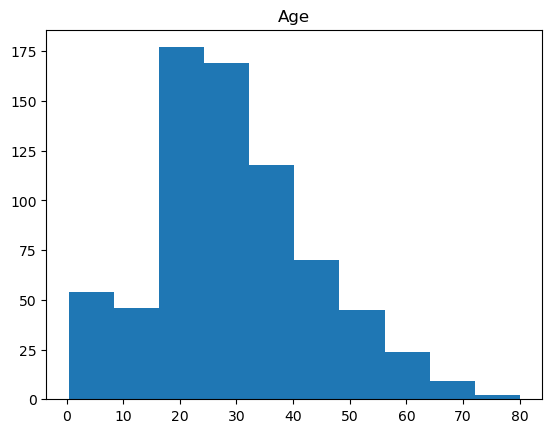

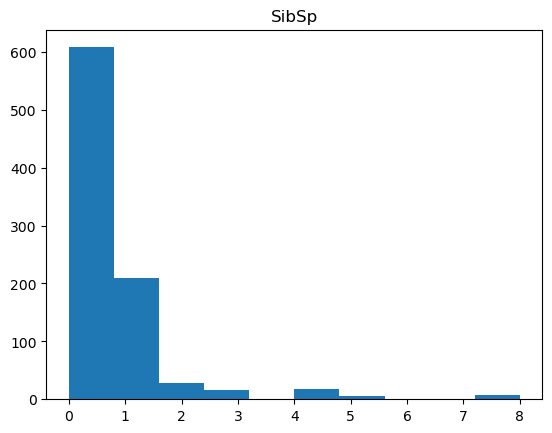

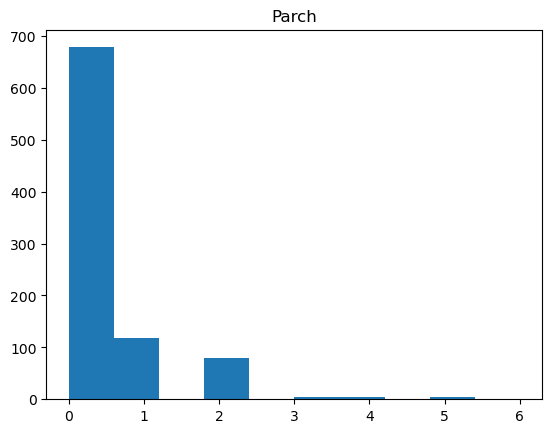

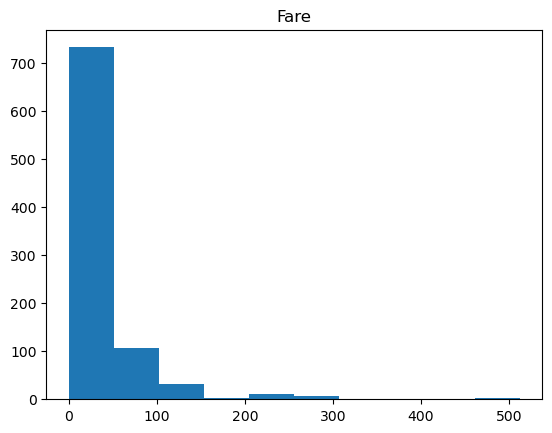

In [9]:
# Exibirimos as distribuibuicões das variaves numericas através de Histogramas, enquantos as categoricas atraves de graficos de barras
for i in var_numericas.columns:
    plt.hist(var_numericas[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

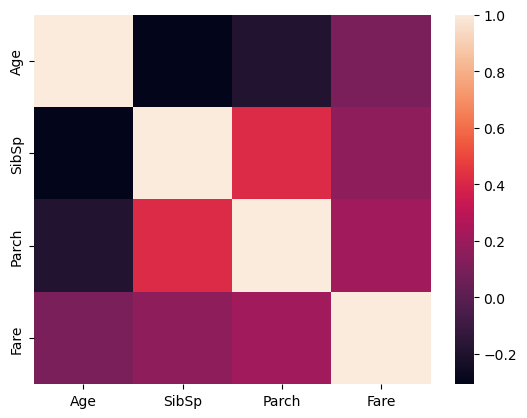

In [10]:
print(var_numericas.corr())
sns.heatmap(var_numericas.corr())

In [11]:
# Comparando a taxa de sobrevivencias com Age, SibSp, Parch e Fare
pd.pivot_table(treino, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


C:\Users\junio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


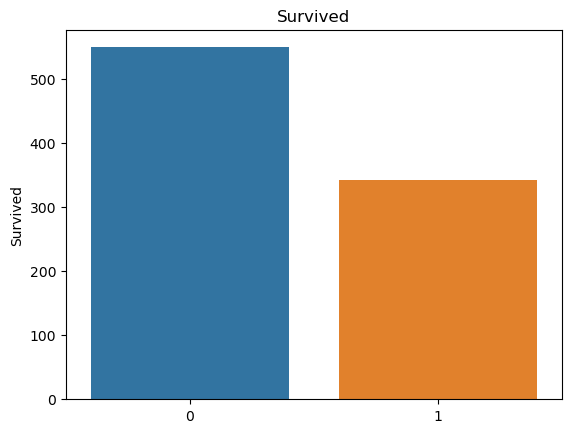

C:\Users\junio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


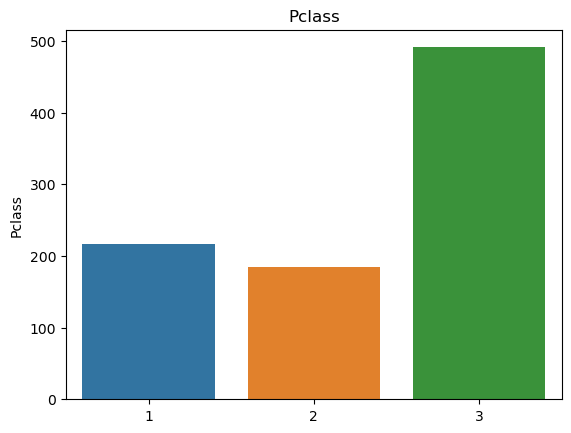

C:\Users\junio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


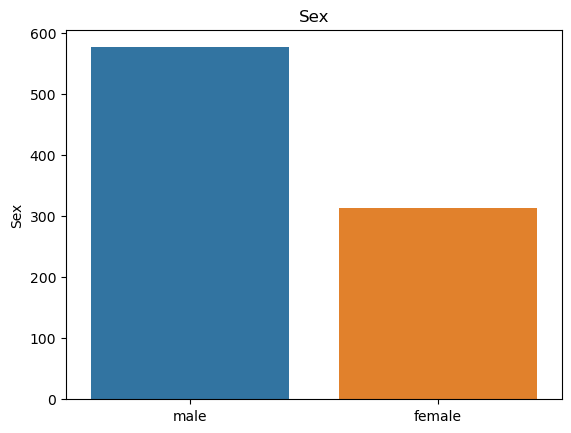

C:\Users\junio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


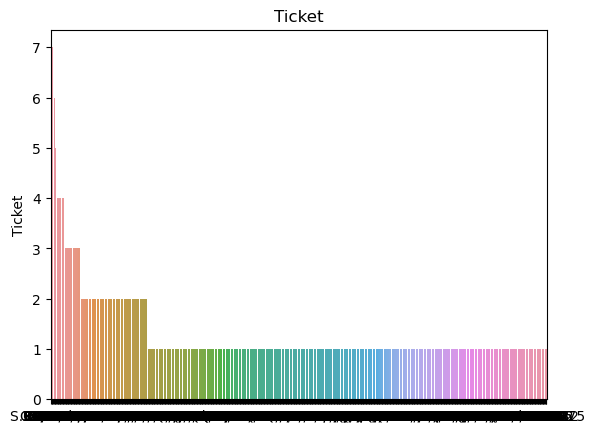

C:\Users\junio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


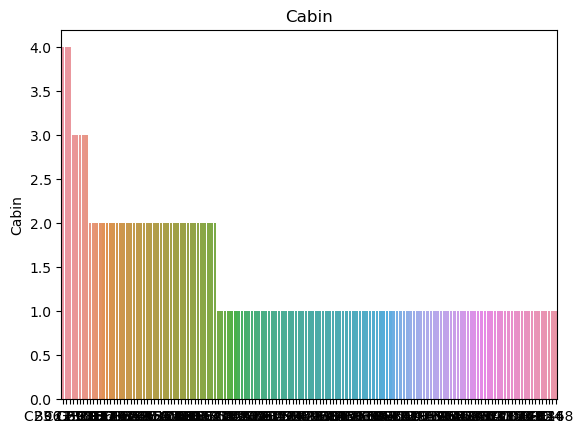

C:\Users\junio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


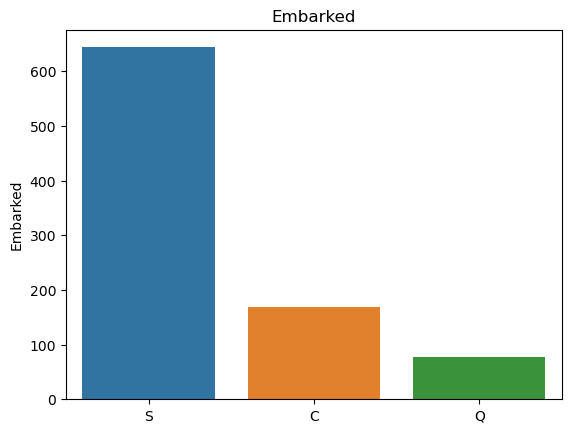

In [12]:
for i in var_categoricas.columns:
    sns.barplot(var_categoricas[i].value_counts().index, var_categoricas[i].value_counts()).set_title(i)
    plt.show()

In [13]:
# Comparando a taxa de sobrevivencias de cada variavel categorica
print(pd.pivot_table(treino, index = 'Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print('===========================')
print(pd.pivot_table(treino, index = 'Survived', columns='Sex', values='Ticket', aggfunc='count'))
print('===========================')
print(pd.pivot_table(treino, index = 'Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [14]:
# Identificando a quantidade de cabines por passageiros. 
var_categoricas.Cabin
treino['cabines_multiplas'] = treino.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))# se Cabin for nulo atribui 0 cabines, senao separe a quantidade de cabines pelos espacos. 
treino['cabines_multiplas'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabines_multiplas, dtype: int64

In [15]:
relacao_cabines_survived = pd.pivot_table(treino, index='Survived', columns='cabines_multiplas', values='Ticket', aggfunc='count')
relacao_cabines_survived

cabines_multiplas,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [16]:
# Taxa de sobrevivencia por quantidade de cabines
sem_cabine = relacao_cabines_survived[0][1] / treino['cabines_multiplas'].value_counts()[0] * 100
uma_cabine = relacao_cabines_survived[1][1] / treino['cabines_multiplas'].value_counts()[1] * 100
duas_cabines = relacao_cabines_survived[2][1] / treino['cabines_multiplas'].value_counts()[2] * 100
tres_cabines = relacao_cabines_survived[3][1] / treino['cabines_multiplas'].value_counts()[3] * 100
quatro_cabines = relacao_cabines_survived[4][1] / treino['cabines_multiplas'].value_counts()[4] * 100

sem_cabine, uma_cabine, duas_cabines, tres_cabines, quatro_cabines

(29.985443959243085, 67.77777777777779, 56.25, 50.0, 100.0)

In [17]:
# Todas as cabines possuem uma letra na identificacao. separamos a quantidade de passageiros em cada cabine
treino['letra_cabine'] = treino.Cabin.apply(lambda x: str(x)[0])

In [18]:
print(treino.letra_cabine.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: letra_cabine, dtype: int64


In [19]:
pd.pivot_table(treino, index='Survived', columns='letra_cabine', values='Ticket', aggfunc='count')

letra_cabine,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [20]:
#entender melhor os valores dos ingressos
#numerico vs não numérico
treino['ticket_numerico'] = treino.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
treino['ticket_string'] = treino.Ticket.apply(lambda x: ''.join(x.split(' ') [:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [21]:
treino['ticket_numerico'].value_counts()

1    661
0    230
Name: ticket_numerico, dtype: int64

In [22]:
treino['ticket_string'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_string, dtype: int64

In [23]:
pd.pivot_table(treino, index='Survived', columns='ticket_numerico',values='Ticket', aggfunc='count')

ticket_numerico,0,1
Survived,,
0,142,407
1,88,254


In [24]:
pd.pivot_table(treino, index='Survived', columns='ticket_string', values='Ticket', aggfunc='count')

ticket_string,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [25]:
# feature engineering no titulo da pessoa
treino.Name.head(50)
treino['titulo_pessoa'] = treino.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) 

In [26]:
treino['titulo_pessoa'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: titulo_pessoa, dtype: int64

In [27]:
pd.pivot_table(treino, index='Survived', columns='titulo_pessoa', values='Ticket', aggfunc='count')

titulo_pessoa,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [28]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabines_multiplas,letra_cabine,ticket_numerico,ticket_string,titulo_pessoa
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr


# Pré Processamento dos dados

- 1- Eliminar dados faltantes
- 2- Incluir apenas dados relevantes:
#### Variaveis: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

 
 - 3- Transformação categorica dos dados
 - 4- Imputar dados com media para tarifa e idade
 - 5- Normalizar tarifa
 - 6- Dados escalonados 0-1 

(889,)

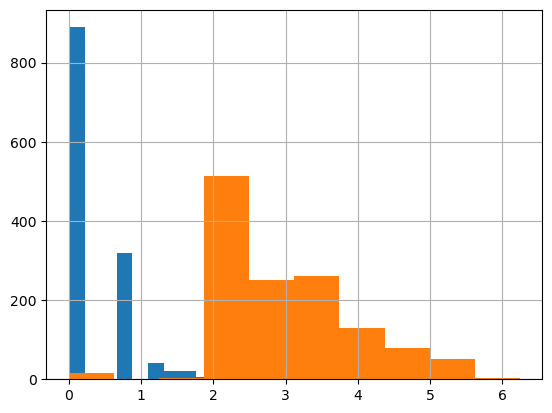

In [32]:
##crie todas as variáveis categóricas que fizemos acima para os conjuntos de treinamento e teste
all_data['cabines_multiplas'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['letra_cabine'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['ticket_numerico'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_string'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['titulo_pessoa'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#imputar nulos para dados continuos
#all_data.Age = all_data.Age.fillna(treino.Age.mean())
all_data.Age = all_data.Age.fillna(treino.Age.median())
#all_data.Fare = all_data.Fare.fillna(treino.Fare.mean())
all_data.Fare = all_data.Fare.fillna(treino.Fare.median())

#Descartar linhas nulas na coluna Embarked, apenas 2 registros 
all_data.dropna(subset=['Embarked'],inplace = True)

# tentativa de nomarlizacao de SibSp (Não Usado)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# normalizacao de fare (Usado)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# conversao de Fare para categorica usando pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#criando variaveis dummys  (tambem pode ser usado OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','letra_cabine','cabines_multiplas','ticket_numerico','titulo_pessoa','train_test']])

#fazendo o Split da base de dados
X_treino = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_teste = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_treino = all_data[all_data.train_test==1].Survived
y_treino.shape

In [34]:
X_treino

,Age,SibSp,Parch,norm_fare,cabines_multiplas,ticket_numerico,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,titulo_pessoa_Master,titulo_pessoa_Miss,titulo_pessoa_Mlle,titulo_pessoa_Mme,titulo_pessoa_Mr,titulo_pessoa_Mrs,titulo_pessoa_Ms,titulo_pessoa_Rev,titulo_pessoa_Sir,titulo_pessoa_the Countess
0,22.0,1,0,2.110213,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,1,0,4.280593,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,26.0,0,0,2.188856,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,35.0,1,0,3.990834,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,35.0,0,0,2.202765,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,2.639057,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,19.0,0,0,3.433987,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
888,28.0,1,2,3.196630,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
889,26.0,0,0,3.433987,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Scale data

In [35]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_treino_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis = 1)
X_teste_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)
y_treino = all_data[all_data.train_test==1].Survived

In [38]:
X_treino.head()

,Age,SibSp,Parch,norm_fare,cabines_multiplas,ticket_numerico,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,titulo_pessoa_Master,titulo_pessoa_Miss,titulo_pessoa_Mlle,titulo_pessoa_Mme,titulo_pessoa_Mr,titulo_pessoa_Mrs,titulo_pessoa_Ms,titulo_pessoa_Rev,titulo_pessoa_Sir,titulo_pessoa_the Countess
0,22.0,1,0,2.110213,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,1,0,4.280593,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,26.0,0,0,2.188856,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,35.0,1,0,3.990834,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,35.0,0,0,2.202765,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# Modelos 

Modelos Utilizados

- Naive Bayes (72.6%)
- Logistic Regression (82.1%)
- Decision Tree (77.6%)
- K Nearest Neighbor (80.5%)
- Random Forest (80.6%)
- Support Vector Classifier (83.2%)
- Xtreme Gradient Boosting (81.8%)
- Soft Voting Classifier - All Models (82.8%)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
# Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_treino_scaled, y_treino, cv = 5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [41]:
# Logistic Regression (Sem data Scale)
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_treino, y_treino, cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [43]:
# Logistic Regression (Com data Scale)
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_treino_scaled, y_treino, cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [44]:
# Decision Tree (Sem data Scale)
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_treino, y_treino, cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [45]:
# Decision Tree (Com data Scale)
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_treino_scaled, y_treino, cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [46]:
# K Nearest Neighbor 
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_treino, y_treino, cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79775281 0.80898876 0.82022472 0.85310734]
0.8099473116231829


C:\Users\junio\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\junio\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [47]:
# K Nearest Neighbor 
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_treino_scaled, y_treino, cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


C:\Users\junio\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\junio\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [48]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_treino,y_treino,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [49]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_treino_scaled,y_treino,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.79213483 0.84831461 0.73595506 0.82485876]
0.8009268075922046


In [50]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_treino_scaled,y_treino,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_treino_scaled,y_treino,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.81460674 0.85393258 0.79775281 0.81355932]
0.8200152351932963
